# 1-9 비지도 학습

- 군집  
비슷한 샘플을 클러스터로 모음  
데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원축소  
- 이상치 탐지  
정상 데이터가 어떻게 보이는지 학습-> 비정상 샘플을 감지하는 데 사용  
- 밀도 추정  
데이터셋 생성 확률 과정의 pdf를 추정  
밀도 추정은 이상치 탐지에서 널리 사용

## 9-1 군집

분류와 마찬가지로 각 샘플은 하나의 그룹에 할당

- 고객분류  
구매 이력이나 웹사이트 내 활동 등을 기반으로 클러스터로 모을 수 있음  
고객 그룹마다 제품 추천이나 마케팅 전략을 다르게 적용  
- 데이터 분석  
군집 알고리즘을 실행하고 각 클러스터를 따로 분석
- 차원 축소 기법  
한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 친화성(샘플이 클러스터형에 얼마나 잘 맞는지)을 측정
- 이상치 탐지  
모든 클러스터에 친화형이 낮은 샘플은 이상치일 가능성이 높음  
제조분야에서 유용  
- 준지도 학습  
레이블된 샘플이 적으면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파  
- 검색 엔진  
제시된 이미지와 비슷한 이미지를 찾아줌  
- 이미지 분할  
색을 기반으로 픽셀을 클러스터로 모음  
각 픽셀의 색을 해당 클러스터형의 평균 색으로 바꿈

#### 데이터 생성

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
np.random.seed(42)

In [2]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [3]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

### 9.1.1 k-평균

반복 몇 번으로 레이블이 없는 데이터셋을 빠르고 효율적으로 클러스터를 묶음

- 미리 만들어 놓은 데이터셋에 K-평균 군집 알고리즘을 훈련  
이 알고리즘은 클러스터 중심을 찾고 각 샘플을 가까운 클러스터에 할당

In [4]:
from sklearn.cluster import KMeans

In [5]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [6]:
y_pred

array([0, 4, 1, ..., 2, 1, 4])

- 5개의 센트로이드 (즉 클러스터 중심)을 찾음

In [7]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

- 새로운 샘플의 레이블을 예측

In [8]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

##### <그림 9-3> 결정 경계(보로노이 다이어그램 )

In [9]:
import matplotlib.pyplot as plt

In [10]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

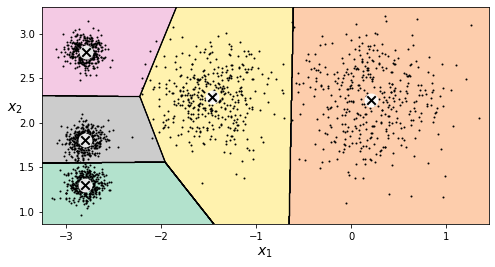

In [11]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

경계 근처에 있는 일부 샘플은 아마도 잘못 클러스터에 할당된 것 같음  
하지만 전반적으로 아주 좋음

- 하드 군집 vs 소프트 군집  
하드 군집:각 샘플에 대해 가장 가까운 클러스터를 선택  
소프트 군집: 샘플에서 k개의 센트로이드까지 거리를 측정  
transform() 메서드에서 이 거리를 계산  

In [12]:
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

#### K-평균 알고리즘

K-평균 알고리즘은 가장 빠르고 가장 간단한 군집 알고리즘 중 하나

- 먼저 k개의 센트로이드를 랜덤하게 초기화:   
데이터셋에서 k개의 샘플을 랜덤하게 선택하고 센트로이드를 그 위치에 놓음  
- 수렴할 때까지 다음을 반복(즉, 센트로이드가 더이상 이동하지 않을 때까지):   
각 샘플을 가장 가까운 센트로이드에 할당  
센트로이드에 할당된 샘플의 평균으로 센트로이드를 업데이트

In [13]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

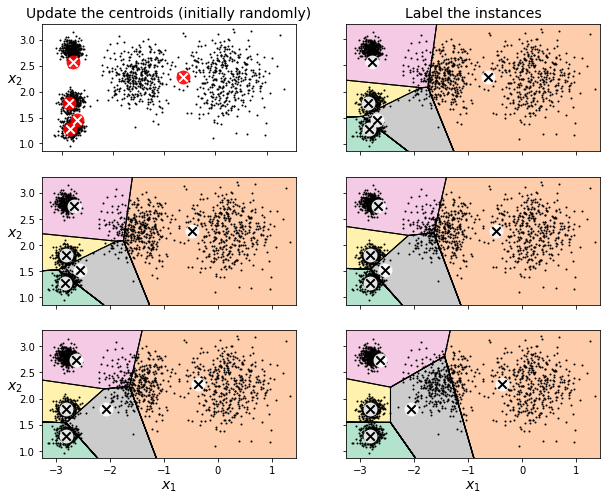

In [14]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)
plt.show()

#### 센트로이드 초기화 방법

In [15]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)

- 센트로이드 위치를 근사하게 알 수 있다면 init매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 n_init=1로 설정  
- 랜덤 초기화를 다르게 하여 여러 번의 알고리즘을 실행하고 가장 좋은 솔루션 선택, 랜덤 초기화 횟수는 n_init로 조절, 기본은 10  
- 성능 지표->  각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리, 이너셔라고 부름

In [16]:
kmeans.fit(X)
kmeans.inertia_

211.62337889822365

##### <그림 9-5> 

원래 K-평균 알고리즘에서는 센트로이가 그냥 랜덤하게 초기되고 알고리즘은 단순히 한번씩 반복하여 앞서 본 것처럼 점차 센트로이드를 개선시킴  

하지만 이 방식의 문제점은 K-평균을 여러번 (또는 다른 랜덤 시드로) 실행하면 아래에서 보듯이 매우 다른 결과를 얻게 됨

In [17]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

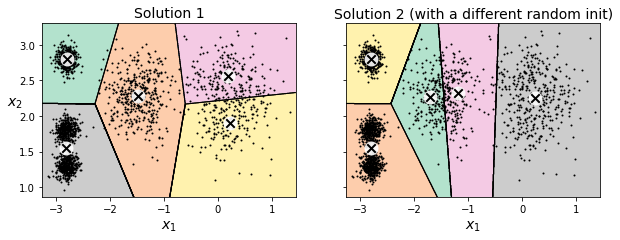

In [18]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [19]:
kmeans_rnd_init1.inertia_

219.8438540223319

In [20]:
kmeans_rnd_init2.inertia_

236.95563196978728

score() 메서드는 음의 이너셔를 반환  
왜 음수일까요? 사이킷런의 score() 메서드는 항상 " 큰 값이 좋은 것 " 규칙을 따라야 하기 때문

In [21]:
kmeans.score(X)

-211.62337889822362

센트로이드를 완전히 랜덤하게 초기화하는 대신 David Arthur와 Sergei Vassilvitskii가 2006년 논문에서 제안한 다음 알고리즘을 사용해 초기화하는 것이 더 좋음

- 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $C_1$을 선택  
- $D(x_i)^2/\sum_{j=1}^{m} D(x_j)^2$의 확률로 샘플$x_i$를 새로운 센트로이드  $C_1$로 선택, 여기에서$D(x_i)$는 샘플$x_i$에서 이미 선택된 가장 센트로이드까지 거리임 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 센트로이드로 선택할 가능성을 높임  
- k개의 센트로이드를 선택할 때까지 이전 단계를 반복

#### K-평균 속도 개선